In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
from fetch_data import fetch_housing_data
from load_data import load_housing_data

## Fetch and Load the housing data

In [4]:
fetch_housing_data()
housing = load_housing_data()

## Display basic information about the dataset

In [5]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

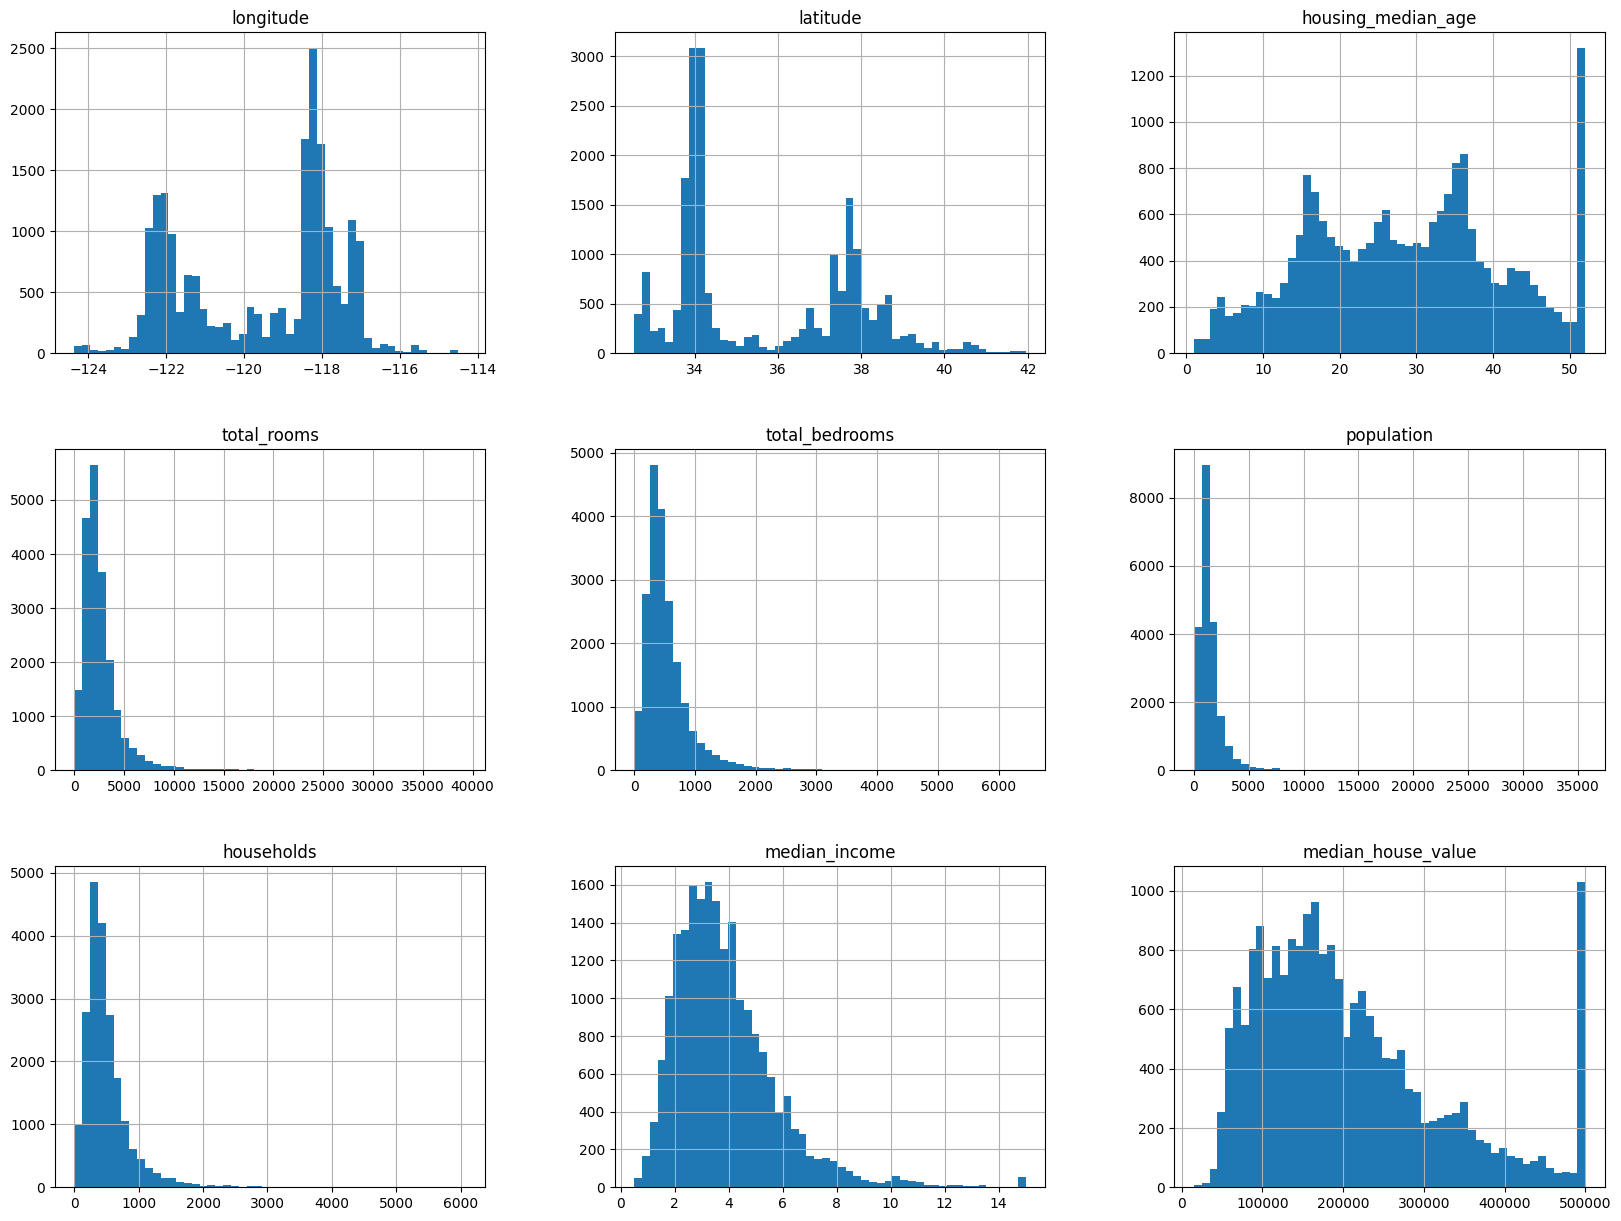

In [8]:
housing.hist(bins=50, figsize=(20, 15))

## Divide the dataset into train and test data

<Axes: >

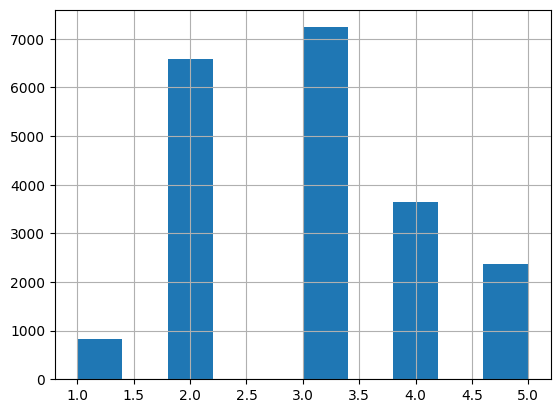

In [9]:
housing["income_cat"] = pd.cut(housing["median_income"],
                                 bins = [0., 1.5, 3.0, 4.5, 6.0, np.inf],
                                 labels = [1, 2, 3, 4, 5])
housing["income_cat"].hist()

In [10]:
split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    stratified_train_set = housing.loc[train_index]
    stratified_test_set = housing.loc[test_index]

comparison_df: pd.DataFrame = pd.DataFrame()
comparison_df["Overall"] = housing["income_cat"].value_counts() / len(housing)
comparison_df["Stratified"] = stratified_test_set["income_cat"].value_counts() / len(stratified_test_set)
comparison_df["Stratified %Error"] = ((comparison_df["Stratified"] - comparison_df["Overall"]).abs() / comparison_df["Overall"]) * 100

comparison_df.sort_index()

,Overall,Stratified,Stratified %Error
income_cat,,,
1,0.039826,0.039971,0.364964
2,0.318847,0.318798,0.015195
3,0.350581,0.350533,0.013820
4,0.176308,0.176357,0.027480
5,0.114438,0.114341,0.084674


In [11]:
housing = stratified_train_set.copy()

## Displays visual information about the train data

<Axes: xlabel='longitude', ylabel='latitude'>

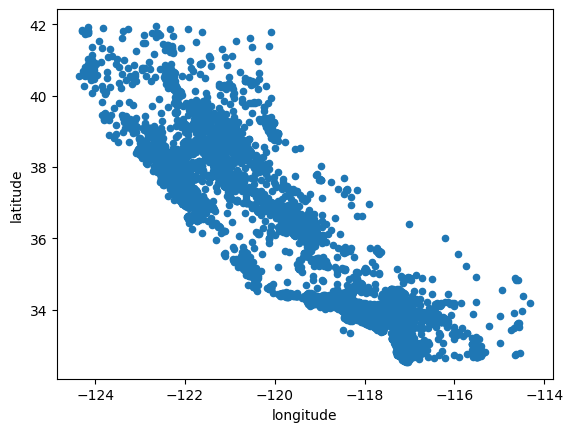

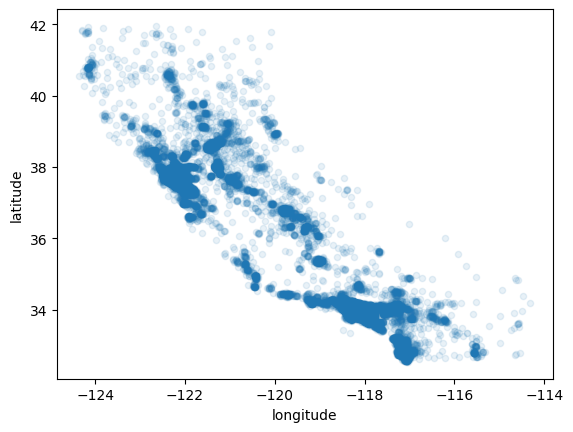

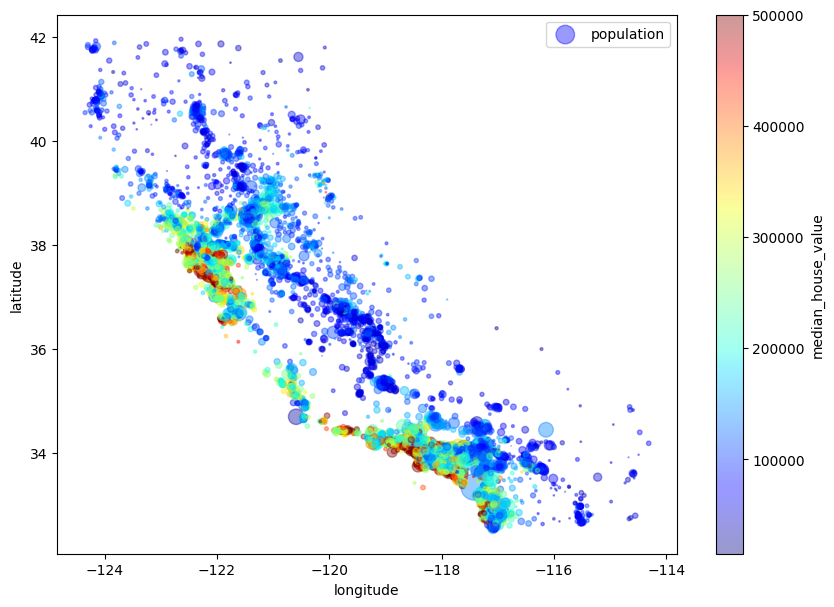

In [12]:
housing.plot(kind="scatter", x="longitude", y="latitude")
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)
housing.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.4,
             s=housing["population"]/100 , label="population", figsize = (10, 7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True
             )

In [13]:
correlation_matrix = housing.corr(numeric_only=True, method="spearman")
correlation_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.675714
total_rooms           0.204476
households            0.110722
total_bedrooms        0.084284
housing_median_age    0.083301
population            0.001309
longitude            -0.071562
latitude             -0.162283
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='longitude', ylabel='longitude'>,
        <Axes: xlabel='latitude', ylabel='longitude'>,
        <Axes: xlabel='housing_median_age', ylabel='longitude'>,
        <Axes: xlabel='total_rooms', ylabel='longitude'>,
        <Axes: xlabel='total_bedrooms', ylabel='longitude'>,
        <Axes: xlabel='population', ylabel='longitude'>,
        <Axes: xlabel='households', ylabel='longitude'>,
        <Axes: xlabel='median_income', ylabel='longitude'>,
        <Axes: xlabel='median_house_value', ylabel='longitude'>],
       [<Axes: xlabel='longitude', ylabel='latitude'>,
        <Axes: xlabel='latitude', ylabel='latitude'>,
        <Axes: xlabel='housing_median_age', ylabel='latitude'>,
        <Axes: xlabel='total_rooms', ylabel='latitude'>,
        <Axes: xlabel='total_bedrooms', ylabel='latitude'>,
        <Axes: xlabel='population', ylabel='latitude'>,
        <Axes: xlabel='households', ylabel='latitude'>,
        <Axes: xlabel='median_income', ylabel='latitude'>,
    

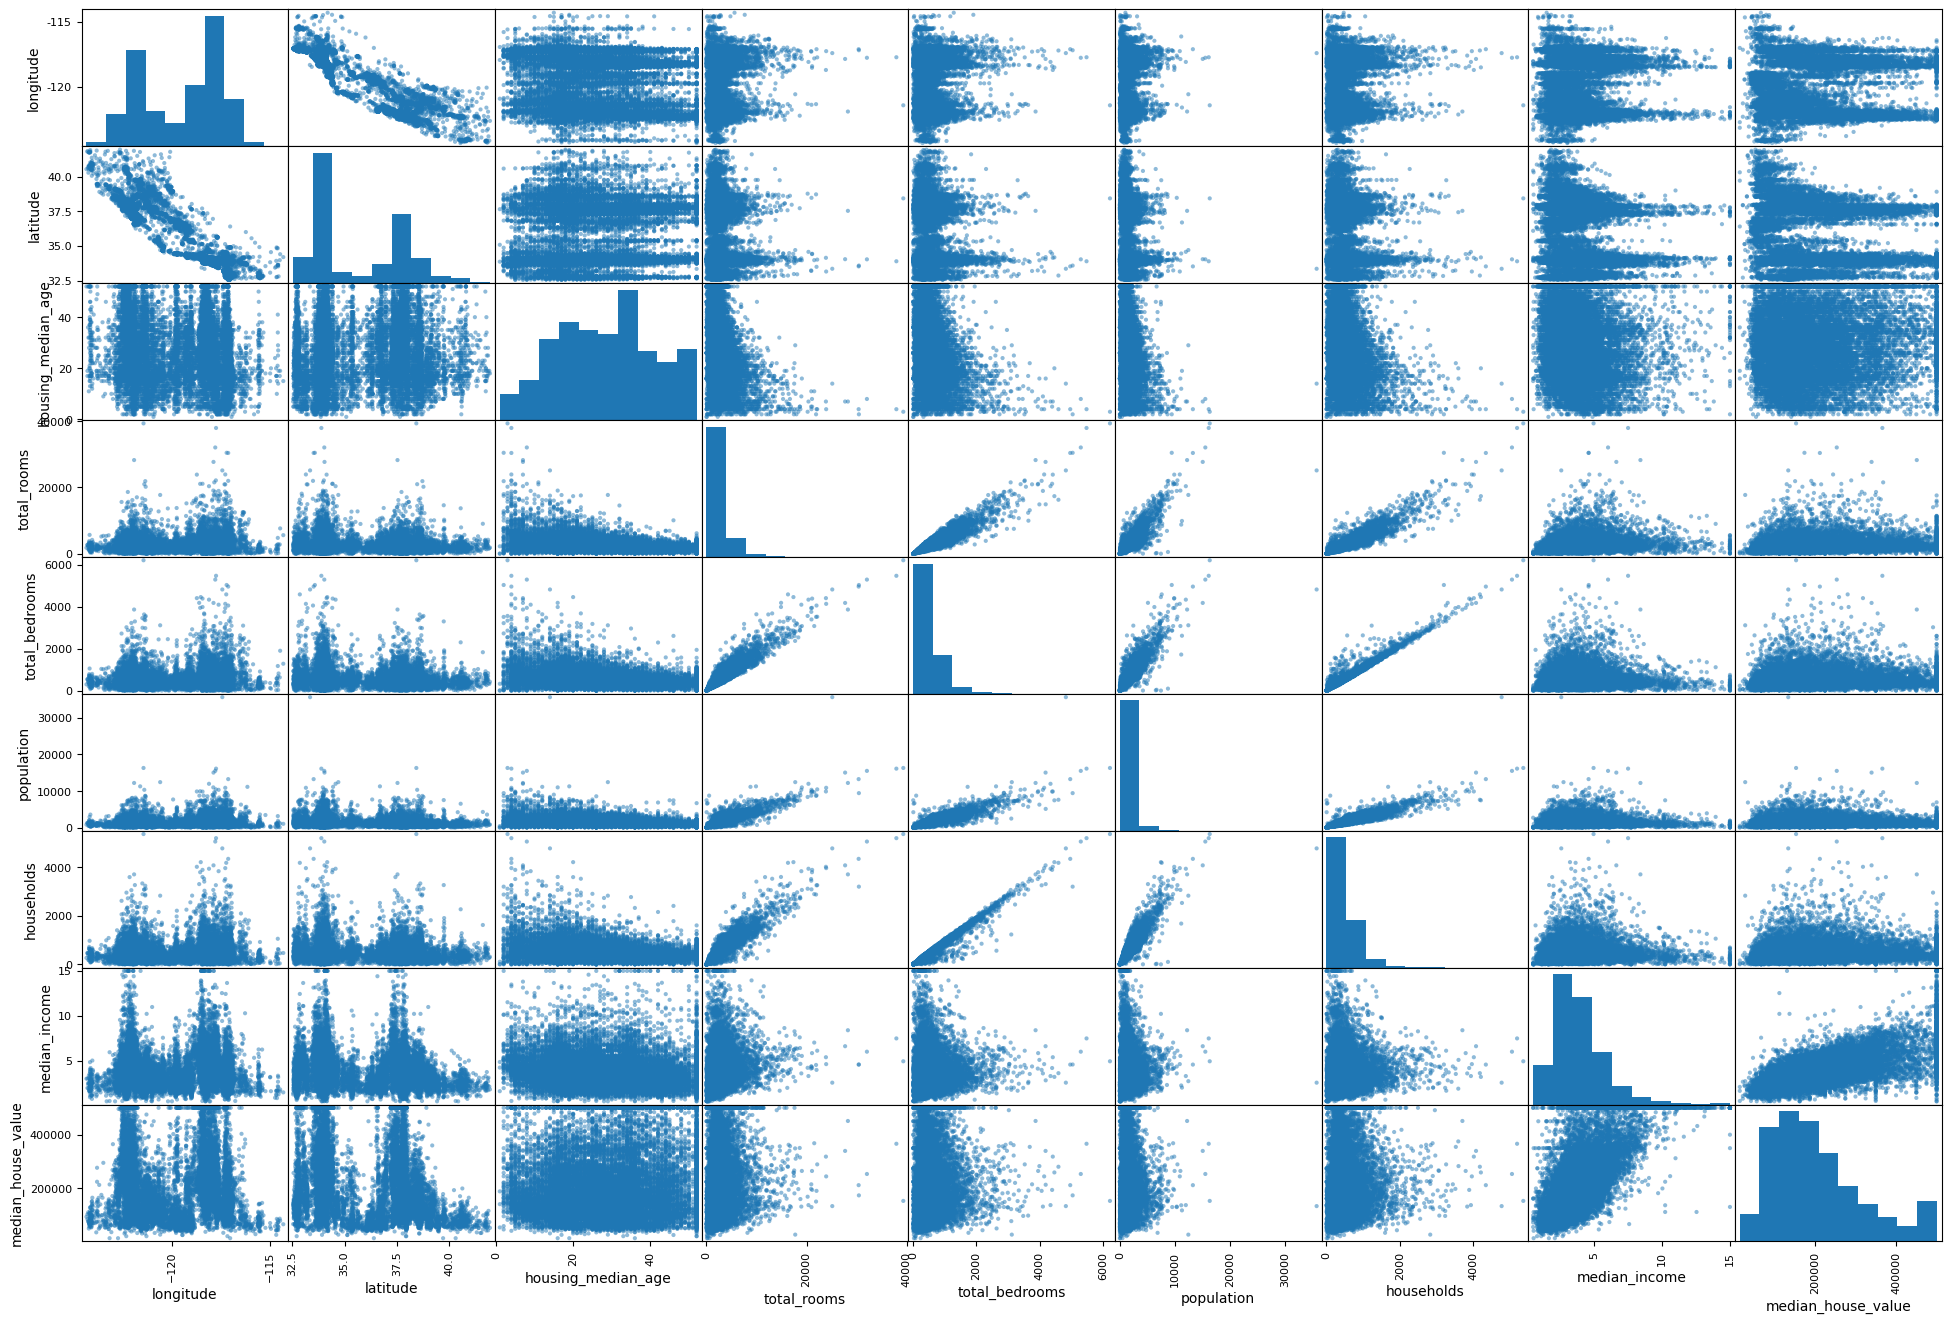

In [14]:
housing_numerical_data = housing.select_dtypes(include=[np.number])
scatter_matrix(housing_numerical_data, figsize=(24, 16))

## Criando novos atributos

In [15]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]
housing["population_per_room"] = housing["population"] / housing["total_rooms"]

housing_numerical_data = housing.select_dtypes(include=[np.number])
correlation_matrix = housing_numerical_data.corr(numeric_only=True, method="spearman")
correlation_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.675714
rooms_per_household         0.263373
total_rooms                 0.204476
households                  0.110722
total_bedrooms              0.084284
housing_median_age          0.083301
population                  0.001309
longitude                  -0.071562
latitude                   -0.162283
population_per_household   -0.256718
bedrooms_per_room          -0.332589
population_per_room        -0.399752
Name: median_house_value, dtype: float64

## Separando o Rótulo do Conjunto de Dados

In [16]:
housing = stratified_train_set.drop("median_house_value", axis=1)
housing_labels = stratified_train_set["median_house_value"].copy()
housing_numerical_data = housing.select_dtypes(include = [np.number])

## Garantindo que não há Dados Nulos

In [17]:
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing_numerical_data)

X = imputer.transform(housing_numerical_data)
housing_transformed = pd.DataFrame(X, columns=housing_numerical_data.columns)

housing_transformed.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,533.939438,1419.687379,497.011810,3.875884
std,2.001828,2.137963,12.574819,2138.417080,410.806260,1115.663036,375.696156,1.904931
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900
25%,-121.800000,33.940000,18.000000,1443.000000,296.000000,784.000000,279.000000,2.566950
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550
75%,-118.010000,37.720000,37.000000,3141.000000,641.000000,1719.000000,602.000000,4.745325
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100


## Converter Atributo Categórico
- Caso o atributo categórico seja ordenado como "ruim", "médio", "bom", podemos apenas substituir os valores na coluna por 0, 1, 2, respectivamente.
- Caso contrário, devemos substituir a coluna por atributos binários. 

In [18]:
housing_categorical = housing[["ocean_proximity"]]

### Caso Ordenado

In [19]:
ordinal_encoder = OrdinalEncoder()

housing_categorical_encoded = ordinal_encoder.fit_transform(housing_categorical)
housing_categorical_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

### Caso Não Ordenado

In [20]:
categorical_encoder = OneHotEncoder()

housing_categorical_one_hot_encoded = categorical_encoder.fit_transform(housing_categorical)
housing_categorical_one_hot_encoded.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]], shape=(16512, 5))

## Criar Transformadores

In [21]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAtributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y = None):
        return self
    
    def transform(self, X, y = None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]

        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        
        else:
            return np.c_[X, rooms_per_household, population_per_household]


## Pipeline de Transformação

In [ ]:
numerical_columns = list(housing_numerical_data)
categorical_columns = list(housing_categorical)

numerical_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

full_pipeline = ColumnTransformer([
    ("num", numerical_pipeline, numerical_columns),
    ("cat", OneHotEncoder(), categorical_columns),
])

housing_prepared = full_pipeline.fit_transform(housing)

(16512, 13)